foward/backward mapping

In [1]:
import numpy as np

In [2]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
y=x*1.5
print(np.round(y,0).astype(np.uint8))

[ 0  2  3  4  6  8  9 10 12 14]


In [11]:
y1=np.arange(15)
print(y1)
x1=np.round(y1/1.5)
print(x1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0. 1. 1. 2. 3. 3. 4. 5. 5. 6. 7. 7. 8. 9. 9.]


In [1]:
import cv2
import sys
import glob
import numpy as np

In [2]:
img = cv2.imread('./fig/puppy.bmp')

if img is None:
    print('read err')
    sys.exit()

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)

while True:
    key = cv2.waitKey()
    if key==27 or key == ord('q'):
        break
cv2.destroyAllWindows()

In [3]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('vid err')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.8)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi',fourcc,fps,(w,h),0)




while True:
    ret,frame = cap.read()
    
    if not ret:
        print('frame err')
        break
    
    edge = cv2.Canny(frame,50,150)
    
    cv2.imshow('image',frame)
    cv2.imshow('edge',edge)
    
    if cv2.waitKey(20)==27:
        break
    
cap.release()
cv2.destroyAllWindows()

In [2]:
img = cv2.imread('./fig/puppy.bmp')

if img is None:
    print('read err')
    sys.exit()

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)

while True:
    key = cv2.waitKey()
    if key==ord('i'):
        img=255-img
        cv2.imshow('image',img)
    elif key==ord('e'):
        img = cv2.Canny(img,50,150)
        cv2.imshow('image',img)
    elif key==27:
        break
cv2.destroyAllWindows()

In [7]:
def call_mouse(event,x,y,flags,param):
    global ox,oy
    if event==cv2.EVENT_LBUTTONDOWN:
        ox,oy=x,y
    elif event==cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(ox,oy),(x,y),(255,255,0),10,cv2.LINE_AA)
            cv2.imshow('image',img)
            ox,oy=x,y
img = np.ones((600,1200,3),np.uint8)*255

cv2.imshow('image',img)

cv2.setMouseCallback('image',call_mouse,img)


cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
def call_track(pos):
    img[:]=np.round(img1*(pos/255),0).astype(np.uint8)
    cv2.imshow('image',img)

img = cv2.imread('./fig/puppy.bmp',0)
img1 = img.copy()

if img is None:
    print('read err')
    sys.exit()

cv2.imshow('image',img)
cv2.createTrackbar('level','image',0,255,call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
tm=cv2.TickMeter()

img = cv2.imread('./fig/puppy.bmp',0)

tm.start()
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
img_blur = cv2.GaussianBlur(img,(0,0),1)
tm.stop()

print(tm.getTimeMilli())

if img is None:
    print('read err')
    sys.exit()

cv2.imshow('image',img)
cv2.imshow('image1',img_blur)

cv2.waitKey()
cv2.destroyAllWindows()

0.9886999999999999


In [29]:
src = cv2.imread('./fig3/lenna.bmp')

# dst = np.clip(src+100.,0,255).astype(np.uint8)

dst = cv2.add(src,(100,100,100,0))

if src is None:
    print('read err')
    sys.exit()
    
cv2.imshow('src',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
import matplotlib.pyplot as plt

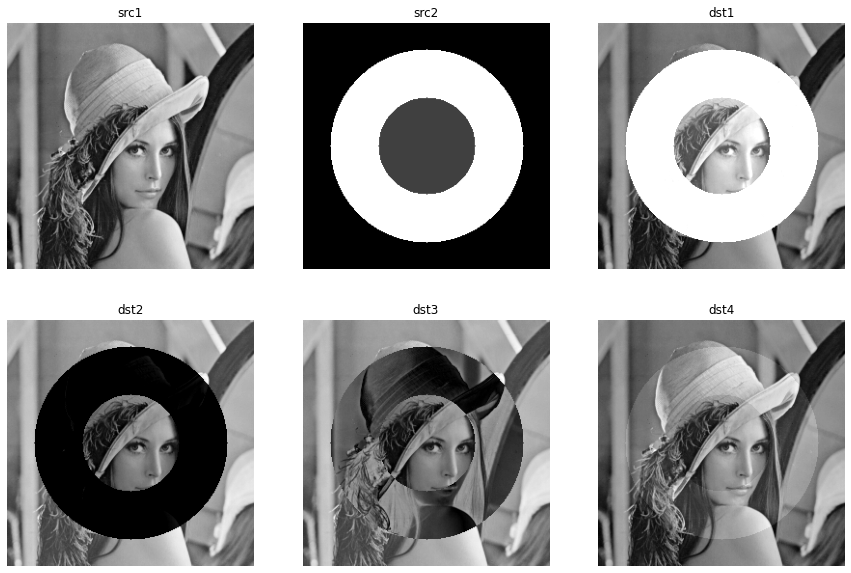

In [42]:
src1 = cv2.imread('./fig3/lenna256.bmp',0)

src2 = np.zeros((256,256),np.uint8)

cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.subtract(src1,src2)
dst3 = cv2.absdiff(src1,src2)
# addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
dst4 = cv2.addWeighted(src1,0.9,src2,0.1,0)

if src is None:
    print('read err')
    sys.exit()
    
# cv2.imshow('src1',src1)
# cv2.imshow('src2',src2)
# cv2.imshow('dst1',dst1)
# cv2.imshow('dst2',dst2)
# cv2.imshow('dst3',dst3)
# cv2.imshow('dst4',dst4)
plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(src1,cmap='gray'),plt.axis('off'),plt.title('src1')
plt.subplot(232),plt.imshow(src2,cmap='gray'),plt.axis('off'),plt.title('src2')
plt.subplot(233),plt.imshow(dst1,cmap='gray'),plt.axis('off'),plt.title('dst1')
plt.subplot(234),plt.imshow(dst2,cmap='gray'),plt.axis('off'),plt.title('dst2')
plt.subplot(235),plt.imshow(dst3,cmap='gray'),plt.axis('off'),plt.title('dst3')
plt.subplot(236),plt.imshow(dst4,cmap='gray'),plt.axis('off'),plt.title('dst4')

# cv2.waitKey()
# cv2.destroyAllWindows()

In [60]:
src = cv2.imread('./fig2/cat123.jpg')
hat = cv2.imread('./fig2/imgbin_hat.png',cv2.IMREAD_UNCHANGED)

if src is None or hat is None:
    print('read err')
    sys.exit()

    
    
src_re = cv2.resize(src,(1200,900))
hat_re = cv2.resize(hat,(400,600))

src1=src_re.copy()

mask = hat_re[:,:,-1]
hat_ = hat_re[:,:,:3]

cv2.copyTo(hat_,mask,src_re[0:600,275:675])

# cv2.imwrite('as.jpg',src_re)

print(src.shape,hat.shape)

for i in range(101):
    abc = cv2.addWeighted(src1,1-i*0.01,src_re,i*0.01,0)
    cv2.imshow('src',abc)
    if cv2.waitKey(30)==27:
        break
# cv2.imshow('hat',hat_re)

# while True:
    




cv2.destroyAllWindows()

(901, 1200, 3) (3507, 2480, 4)


In [67]:
src1 = np.zeros((256,256),np.uint8)
src2 = np.zeros((256,256),np.uint8)

cv2.rectangle(src1,(10,10),(127,250),255,-1)
cv2.circle(src2,(128,128),100,255,-1)

b_and=cv2.bitwise_and(src1,src2)
b_or=cv2.bitwise_or(src1,src2)
b_xor=cv2.bitwise_xor(src1,src2)
b_not=cv2.bitwise_not(src1,src2)

cv2.imshow('src1',src1)
cv2.imshow('src2',src2)
cv2.imshow('ba',b_and)
cv2.imshow('bo',b_or)
cv2.imshow('bx',b_xor)
cv2.imshow('bn',b_not)

cv2.waitKey()
cv2.destroyAllWindows()

In [77]:
src=cv2.imread('./fig3/flowers.jpg')

src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

b,g,r=cv2.split(src)
h,s,v=cv2.split(src_hsv)

# src_m=cv2.merge((b,g,r))

cv2.imshow('src',src)
# cv2.imshow('b',b)
# cv2.imshow('g',g)
# cv2.imshow('r',r)
# cv2.imshow('src_m',src_m)
cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)

cv2.waitKey()
cv2.destroyAllWindows()